<h1><center>Research Homework 1</center></h1>
<h2><center>Kirillov Gleb</center></h2>

In [1]:
# Installation of necessary libraries
!pip3 install matplotlib numpy sympy
# Importing these libs
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

You should consider upgrading via the 'C:\Users\Глебасс\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


## Solution

Firstly, let's introduce initial equations and restrictions on accelerations and velocity:
$$a_{t_{max}}=10m/s^2$$
$$a_{n_{max}}=6m/s^2$$
$$v_{max}=1.5m/s^2$$
$$y(x)=A*sin(om*x+\theta_0)$$
<center>$A = 1$, $om = 3$, $\theta_0 = 0.2$, $x$ $exists$ $on$ $[0...4]$</center>

In [2]:
# Defining these constants in the code
x_min = 0
x_max = 4
x=np.linspace(x_min, x_max, 500)

a_t_max = 10
a_n_max = 6
v_max = 1.5

A = 1
om = 3
theta = 0.2

y = A * np.sin(om * x + theta)

Let's plot y(x) graph:

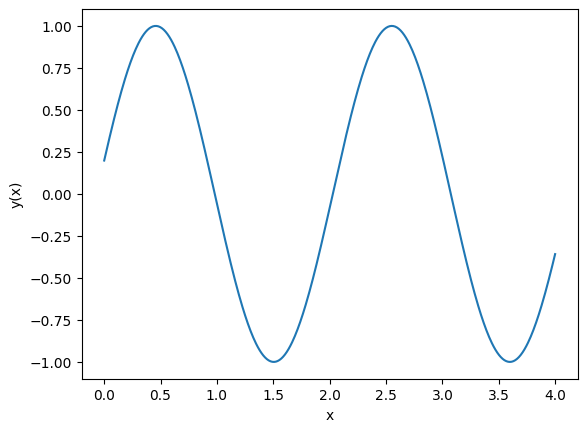

In [3]:
plt.plot(x, y)
plt.xlabel("x")
plt.ylabel("y(x)")

plt.savefig("trajectory Y(x).png")
plt.show()

We need to understand how restrictions affect motion.

First, $v(t)<=1.5m/s$. So, at any point of time and at any x velocity will be less or equal to $1.5m/s$. Therefore, $v(x)<=1.5m/s$ also.


Second, $a_{n}(t)<=6m/s^2$. So, at any point of time and at any x normal acceleration will be less or equal to $6m/s^2$. Therefore, $a_{n}(x)<=6m/s^2$ also. On the other hand, $a_{n}(x)=\frac{{v(x)}^2}{\rho}$ ($\rho$ is radius of curvature). Thus, $\frac{{v(x)}^2}{\rho}<=6m/s^2$, so $v(x)<=\sqrt{6*\rho}$

Radius of a curvature can be found by using such formula (lab 1, slide 26):
$$\rho=\frac{(\sqrt{1+\dot y(x)^2})^3}{|\ddot y(x)|$$

$$\dot y(x) = A * om * cos(om * x + \theta_0)$$
$$\ddot y(x) = - A * om^2 * sin(om * x + \theta_0)$$

So, now we have 2 limitations on the velocity: initial one and the one we get from limitation of normal acceleration. The fastest way to overcome trajectory is by moving with the highest possible velocity. So, let's plot the graph of maximal velocity ($v(x)$) using these 2 limitations:

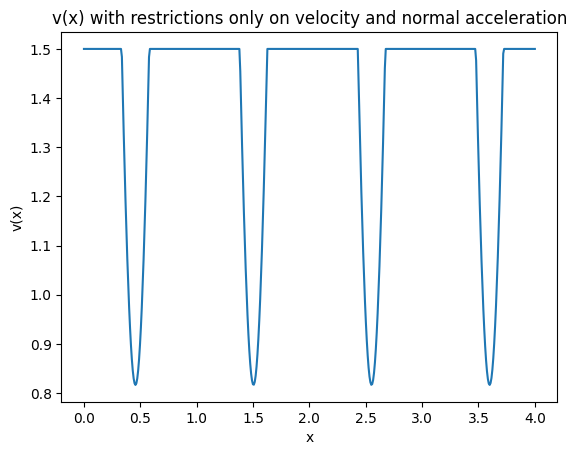

In [4]:
y_dot = A * om * np.cos(om * x + theta)
y_ddot = -A * om ** 2 * np.sin(om * x + theta)
r = [sp.sqrt(1 + y_d ** 2).evalf() ** 3 / np.abs(y_dd) for y_d, y_dd in zip(y_dot, y_ddot)]

v = np.clip(np.array([sp.sqrt(a_n_max * rad) for rad in r]), -v_max, v_max)

plt.plot(x, v)
plt.xlabel("x")
plt.ylabel("v(x)")
plt.title("v(x) with restrictions only on velocity and normal acceleration")
plt.show()

Now we need to understand how restriction on tangential acceleration affects motion

We know that:
$$a_{tan}=\frac{dv}{dt}=\frac{dv}{dx}*\frac{dx}{d\sigma} * \frac{d\sigma}{dt}$$

Also, we know that $\frac{d\sigma}{dt}=v$ and we know that $\frac{d\sigma}{dx}=\frac{\sqrt{dx^2 + dy^2}}{dx} = \sqrt{1+{\dot y}^2}$

So, from that we get:
$$\frac{dv}{dx}=\frac{a_{tan}*\sqrt{1+{\dot y}^2}}{v}$$

In other words:
$$\frac{dv}{dx}<=\frac{a_{t_{max}}*\sqrt{1+{\dot y}^2}}{v}$$

Numerically it means that:
$$\frac{v_i-v_{i-1}}{x_i-x_{i-1}}<=\frac{a_{t_{max}}*\sqrt{1+{\dot y_i}^2}}{v_i}$$
$$v_i<=v_{i-1}+\frac{a_{t_{max}}*\sqrt{1+{\dot y_i}^2}}{v_i}*(x_i-x_{i-1})$$

Let's adjust previous model by adding this restriction on tangential acceleration:

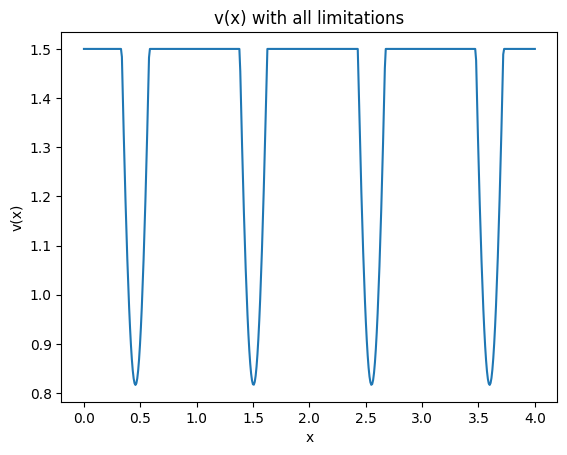

In [5]:
# We check each difference between nearby velocities
dsigma = [sp.sqrt(1 + y_dot[0] ** 2).evalf()]
for i, j in zip(range(len(v) - 1), range(1, len(v))):
    dsigma.append(sp.sqrt(1 + y_dot[j] ** 2).evalf())
    dx = x[j] - x[i]
    if abs(v[j]) > abs(v[i] + a_t_max * dsigma[j] / v[j] * dx):
        v[j] = v[i] + a_t_max * dsigma[j] / v[j] * dx

plt.plot(x, v)
plt.xlabel("x")
plt.ylabel("v(x)")
plt.title("v(x) with all limitations")
plt.show()

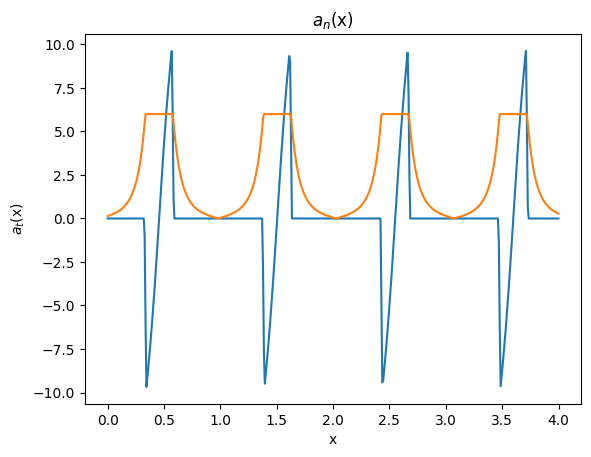

In [6]:
# Plot of tangential acceleration and normal acceleration with respect to x
a_t = np.gradient(v, x)
plt.plot(x, a_t)
plt.xlabel("x")
plt.ylabel("$a_{t}$(x)")
plt.title("$a_{t}$(x)")

a_n = np.power(v, 2) / r
plt.plot(x, a_n)
plt.title("$a_{n}$(x)")
plt.show()

Now, after we get an approximate model of the movement with respect to x, let's find the model of motion with respect to time.

$$\frac{d\sigma}{dt}=v => dt=\frac{d\sigma}{dx} * \frac{dx}{v} => t =\int{\frac{\sqrt{1+{\dot y} ^ 2}}{v}dx}$$

So we get function t(x), numerically it is represented as:
$$t_j = \sum_{i=1}^{i=j}{\frac{\sqrt{1+{\dot y_i} ^ 2}}{v_i} * (x_i - x_{i-1})$$

Similarly, let's represent x(t):
$$x_j = \sum_{i=1}^{i=j}{\frac{v_i}{\sqrt{1+{\dot y_i} ^ 2}} * (t_i - t_{i-1})$$

In [7]:
time = [0]
dts = dsigma / v
for i in range(1, len(dts)):
    time.append(time[i-1] + dts[i] * (x[i] - x[i - 1]))

print("total time is:", time[-1])

for i in range(len(v)):
    if v[i] != 1.5:
        print("time before we firstly turn:", time[i])
        break

for i in range(len(v)):
    if v[-i] != 1.5:
        print("time after we lastly turn:", time[-1] - time[-i])
        break

total time is: 6.15569326730942
time before we firstly turn: 0.538788933781607
time after we lastly turn: 0.433905961613046


However, we did not consider the beginning and the end of motion.

Let's check time required to gain speed from zero to maximum ($1.5m/s^2$):
$$t_{req}=\frac{v_{max}}{a_{t}_{max}}=0.15s$$

Time required for deceleration will be the same.

As we can see from data we get from code snippet above, even with maximal speed at the beginning we will not achieve first turn (place there speed will be limited by tangential or normal acceleration) in 0.15 seconds. Similarly, we will not achieve last turn (place there speed will be limited by tangential or normal acceleration) before 0.15 seconds of reaching the end of the trajectory.

Thus, we can use trapezoidal profile, so in the beginning and in the end velocity will have the following formulas:
$v_{start}=a_t_{max}*t$ and $v_{end}=v_{max}-a_t_{max}*t$, respectively

In addition, we should understand, when it is required to start deceleration. For this purpose let's find the length of the path we will move during deceleration:
$$s=\frac{a_t_{max}*t_{req}^2}{2}=0.1125m$$

So, when we have such length before the end of the path, we will start deceleration.

Total length of a curve can be found as (lab 1, slide 25):
$$s_{total}=\int_{x_{min}}^{x_{max}}{\sqrt{1+{\dot y} ^ 2}dx}$$
Numerically:
$$s_{total}=\sum_{i=1}^{i=n}{\sqrt{1+{\dot y(x_i)} ^ 2}(x_i-x_{i-1})}$$

Let's improve our model again.

In [8]:
time = [0]
dt = 0.001
x_f = [0] #x(t) for final model
y_f = [y[0]]
x_prev = 0 #previous x
v_f = [0] #velocity for final model
a_t_f = [0] #tangential acceleration for final model
a_n_f = [0] #normal acceleration for final model
s_dec = 0.1125 #length of the curve before the end of the motion
s_total = sum([dsigma[i] * (x[i] - x[i-1]) for i in range(1, len(x))]) #total length of the curve
s_current = 0 # distance traveled by this moment
while v_f[-1] + dt * a_t_max < 1.5: # initial acceleration
    # int(x_f[-1] / x[-1] * len(x)) is an index of x for this time. We can get any value of function depended on x
    time.append(time[-1] + dt)
    x_prev = x_f[-1]
    x_f.append(x_f[-1] + v_f[-1] / dsigma[int(x_f[-1] / x[-1] * len(x))] * dt)
    v_f.append(v_f[-1] + dt * a_t_max)
    s_current += dsigma[int(x_f[-1] / x[-1] * len(x))] * (x_f[-1] - x_prev)
    a_t_f.append(a_t_max)
    a_n_f.append(v_f[-1] ** 2 / r[int(x_f[-1] / x[-1] * len(x))])
    y_f.append(y[int(x_f[-1] / x[-1] * len(x))])
while s_current < s_total - s_dec: # after initial acceleration and before final deceleration
    time.append(time[-1] + dt)
    x_prev = x_f[-1]
    x_f.append(x_f[-1] + v_f[-1] / dsigma[int(x_f[-1] / x[-1] * len(x))] * dt)
    v_f.append(v[int(x_f[-1] / x[-1] * len(x))])
    a_t_f.append(a_t[int(x_f[-1] / x[-1] * len(x))])
    a_n_f.append(v_f[-1] ** 2 / r[int(x_f[-1] / x[-1] * len(x))])
    s_current += dsigma[int(x_f[-1] / x[-1] * len(x))] * (x_f[-1] - x_prev)
    y_f.append(y[int(x_f[-1] / x[-1] * len(x))])
while v_f[-1] > 0: # final deceleration
    time.append(time[-1] + dt)
    x_prev = x_f[-1]
    x_f.append(x_f[-1] + v_f[-1] / dsigma[int(x_f[-1] / x[-1] * len(x))] * dt)
    v_f.append(v_f[-1] - dt * a_t_max)
    a_t_f.append(-a_t_max)
    a_n_f.append(v_f[-1] ** 2 / r[int(x_f[-1] / x[-1] * len(x))])
    s_current += dsigma[int(x_f[-1] / x[-1] * len(x))] * (x_f[-1] - x_prev)
    y_f.append(y[int(x_f[-1] / x[-1] * len(x))])

Now we have everything we need to plot graphs of final model for motion along given trajectory.

Let's plot all required graphs.

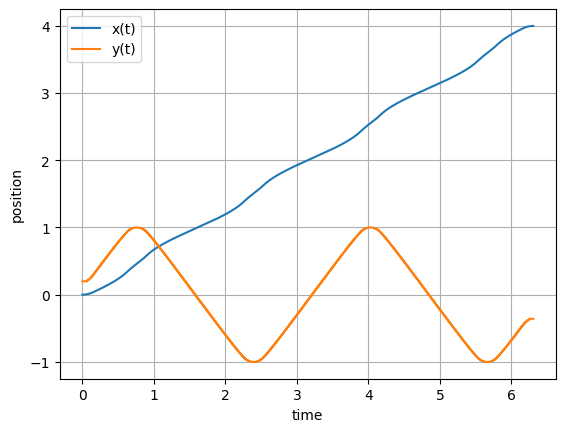

In [9]:
plt.grid()
plt.xlabel('time')
plt.ylabel('position')
plt.plot(time, x_f, label='x(t)')
plt.plot(time, y_f, label='y(t)')
plt.legend()
plt.savefig("trajectory Y(t) and X(t).png")
plt.show()

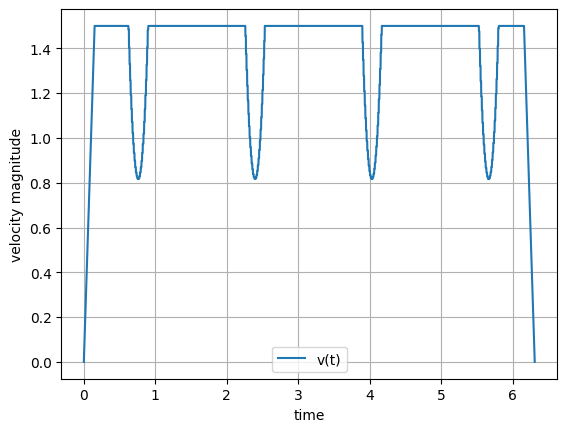

In [10]:
plt.grid()
plt.xlabel('time')
plt.ylabel('velocity magnitude')
plt.plot(time, v_f, label='v(t)')
plt.legend()
plt.savefig("v(t).png")
plt.show()

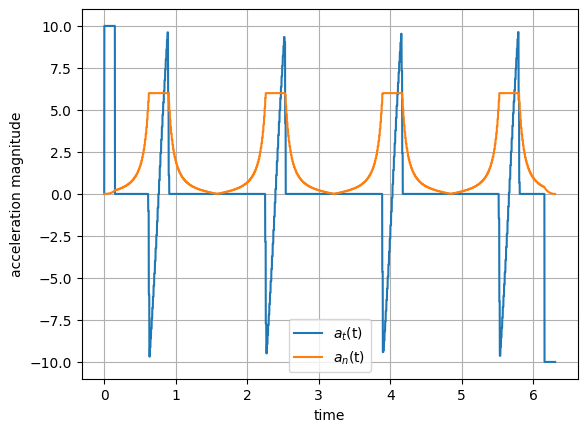

In [11]:
plt.grid()
plt.xlabel('time')
plt.ylabel('acceleration magnitude')
plt.plot(time, a_t_f, label='$a_t$(t)')
plt.plot(time, a_n_f, label='$a_n$(t)')
plt.legend()
plt.savefig("a_t(t) and a_n(t).png")
plt.show()

Finally, I want to show that all restrictions are satisfied.

In [12]:
print("Maximal value for velocity:", np.max(v_f), "\nMinimal value for velocity:", np.min(v_f))
print("\nMaximal value for normal acceleration:", np.max(a_n_f), "\nMinimal value for normal acceleration:", np.min(a_n_f))
print("\nMaximal value for tangential acceleration:", np.max(a_t_f), "\nMinimal value for tangential acceleration:", np.min(a_t_f))
print("\nTotal time:", time[-1])

Maximal value for velocity: 1.5 
Minimal value for velocity: -1.1969591984239969e-15

Maximal value for normal acceleration: 6.00000000000000 
Minimal value for normal acceleration: 0

Maximal value for tangential acceleration: 10.0 
Minimal value for tangential acceleration: -10.0

Total time: 6.306000000000441
